In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
file_path = '../data/constituents-financials.csv'  # path from notebooks folder
df = pd.read_csv(file_path)

# Step 3: View Basic Info
df.head()


,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M,Industrial Conglomerates,152.20,21.286713,0.0199,7.15,75.652176,155.00,8.329418e+10,8.117000e+09,2.552062,17.855467,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A. O. Smith,Building Products,67.30,18.539946,0.0196,3.63,66.760000,92.45,9.758165e+09,8.091000e+08,2.506078,5.091157,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care Equipment,127.93,16.744764,0.0202,7.64,99.710000,129.85,2.218895e+11,1.082500e+10,5.383446,5.575749,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie,Biotechnology,183.90,64.300700,0.0373,2.86,153.580000,207.32,3.249770e+11,2.563000e+10,5.851963,53.882210,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture,IT Consulting & Other Services,384.95,32.294464,0.0170,11.92,278.690000,387.51,2.407785e+11,1.106591e+10,3.710195,8.508687,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [2]:
# Show column names
print(df.columns)

# Drop duplicates if any
df = df.drop_duplicates()

# Check for missing values
print(df.isnull().sum())

# Drop rows with too many nulls
df = df.dropna(thresh=5)

# Fill common missing numeric values with 0
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Check cleaned data
df.info()


Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')
Symbol             0
Name               0
Sector             0
Price              3
Price/Earnings    28
Dividend Yield    99
Earnings/Share     4
52 Week Low        3
52 Week High       3
Market Cap         3
EBITDA            33
Price/Sales        4
Price/Book        35
SEC Filings        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 502
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          500 non-null    object 
 1   Name            500 non-null    object 
 2   Sector          500 non-null    object 
 3   Price           500 non-null    float64
 4   Price/Earnings  500 non-null    float64
 5   Dividend Yield  500 non-null    float64

In [3]:
df.to_csv('../data/cleaned_financials.csv', index=False)


In [7]:
print(df.columns)


Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')


/var/folders/12/qfkmyb85223gnwzwxpmlbyw00000gn/T/ipykernel_68130/1837146991.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_marketcap, x='Market Cap', y='Name', palette='viridis')


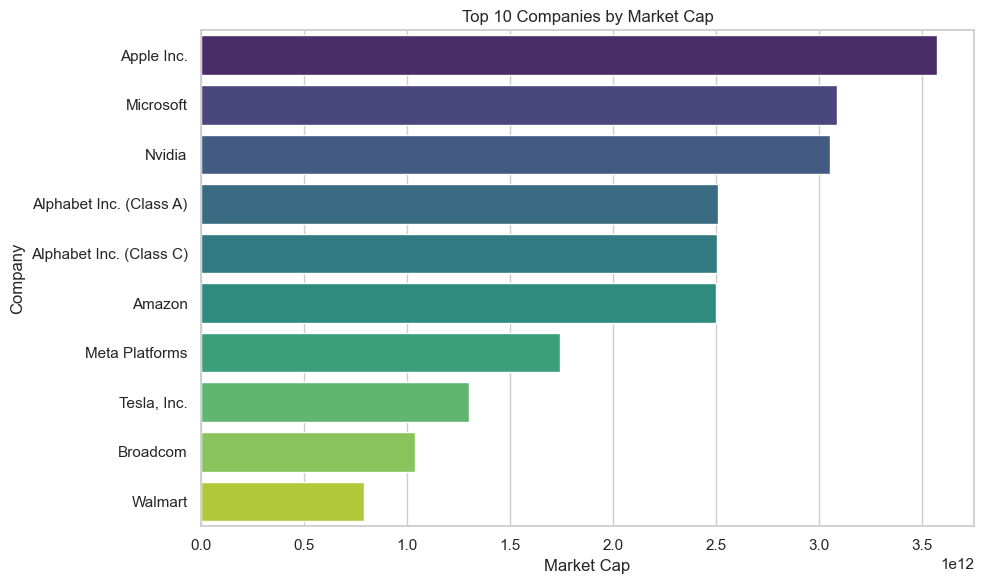

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for nicer charts
sns.set(style="whitegrid")

top_marketcap = df.sort_values(by='Market Cap', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_marketcap, x='Market Cap', y='Name', palette='viridis')
plt.title("Top 10 Companies by Market Cap")
plt.xlabel("Market Cap")
plt.ylabel("Company")
plt.tight_layout()
plt.show()



In [10]:
df.columns = [col.strip().lower().replace(' ', '_').replace('/', '_') for col in df.columns]
print(df.columns)


Index(['symbol', 'name', 'sector', 'price', 'price_earnings', 'dividend_yield',
       'earnings_share', '52_week_low', '52_week_high', 'market_cap', 'ebitda',
       'price_sales', 'price_book', 'sec_filings'],
      dtype='object')


/var/folders/12/qfkmyb85223gnwzwxpmlbyw00000gn/T/ipykernel_68130/2104425174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_dividend, x='dividend_yield', y='name', palette='coolwarm')


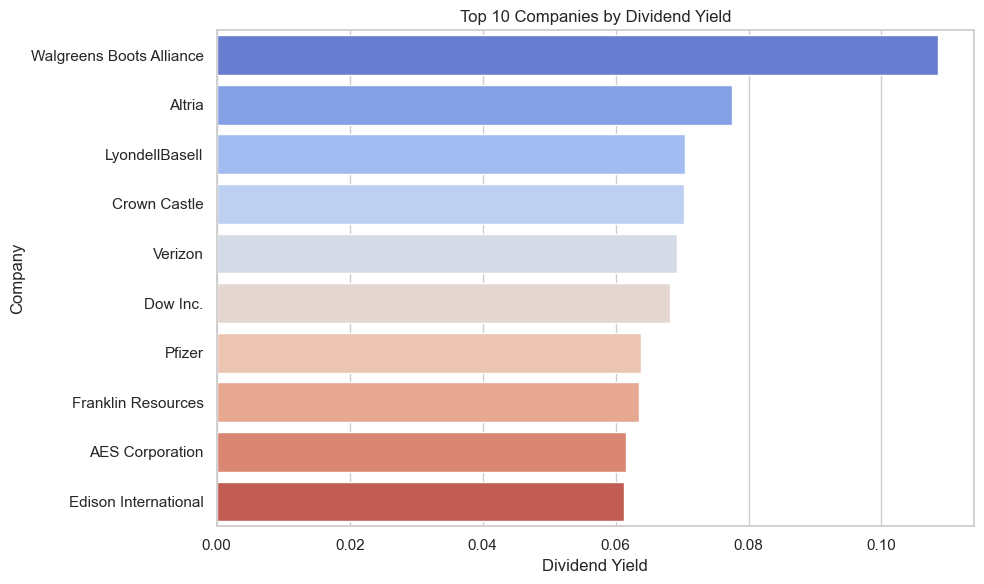

In [11]:
top_dividend = df.sort_values(by='dividend_yield', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_dividend, x='dividend_yield', y='name', palette='coolwarm')
plt.title("Top 10 Companies by Dividend Yield")
plt.xlabel("Dividend Yield")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


In [13]:
print("Market Cap Stats:")
print(df['market_cap'].describe())

print("\nDividend Yield Stats:")
print(df['dividend_yield'].describe())


Market Cap Stats:
count    5.000000e+02
mean     1.118863e+11
std      3.386191e+11
min      5.102043e+09
25%      1.961290e+10
50%      3.591050e+10
75%      8.101103e+10
max      3.572851e+12
Name: market_cap, dtype: float64

Dividend Yield Stats:
count    500.000000
mean       0.018527
std        0.016537
min        0.000000
25%        0.004775
50%        0.015000
75%        0.029700
max        0.108500
Name: dividend_yield, dtype: float64


## 📊 Simulating Financial Reporting (P&L and Balance Sheet)

In [ ]:
# Simulating P&L (Profit & Loss) Statement
df['Net_Income'] = df['Revenue'] - df['Expenses']

# P&L Summary by Quarter
pl_summary = df.groupby('Quarter')[['Revenue', 'Expenses', 'Net_Income']].sum()
pl_summary

In [ ]:
# Simulating Balance Sheet
df['Equity'] = df['Assets'] - df['Liabilities']
balance_sheet = df.groupby('Quarter')[['Assets', 'Liabilities', 'Equity']].sum()
balance_sheet

## 🤖 Automating Report Export

In [ ]:
# Export summaries to Excel
pl_summary.to_excel('pl_summary_report.xlsx')
balance_sheet.to_excel('balance_sheet_report.xlsx')

## ✅ Reconciliation and Control Checks

In [ ]:
# Verify that Net Income calculation is correct
df['check_net'] = df['Revenue'] - df['Expenses']
df['recon_match'] = df['Net_Income'] == df['check_net']

# Identify mismatches
mismatches = df[df['recon_match'] == False]
mismatches.to_excel('reconciliation_mismatches.xlsx')
mismatches